In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u

specObjID,z,z_err,ra,dec,petroMag_g,petroMag_r,petroMag_i,h_alpha_flux,h_alpha_flux_err,h_beta_flux,h_beta_flux_err,oiii_5007_flux,oiii_5007_flux_err,oi_6300_flux,oi_6300_flux_err,nii_6584_flux,nii_6584_flux_err,sii_6717_flux,sii_6717_flux_err,sii_6731_flux,sii_6731_flux_err,h_delta_flux,h_delta_flux_err

In [2]:
data=np.loadtxt('GU2_TP_third_BeomChan_Koh.csv',skiprows=1,delimiter=',')

In [3]:
data=data.T

In [4]:
ID=data[0]
z=data[1]
z_err=data[2]
RA=data[3]
DEC=data[4]
gmag=data[5]
rmag=data[6]
imag=data[7]
halpha=data[8]
halpha_err=data[9]
hbeta=data[10]
hbeta_err=data[11]
oiii=data[12]
oiii_errr=data[13]
oi=data[14]
oi_err=data[15]
nii=data[16]
nii_err=data[17]
sii6717=data[18]
sii6717_err=data[19]
sii6731=data[20]
sii6731_err=data[21]
hdelta=data[22]
hdelta_err=data[23]

In [5]:
np.min(halpha)

-122081600000.0

In [6]:
Mr= rmag - 5.0*np.log10(cosmo.luminosity_distance(z).to('pc').value/10.0)

/var/folders/9m/m8964gr50w3347xwt0ymr2jm0000gp/T/ipykernel_31807/3179623443.py:1: RuntimeWarning: invalid value encountered in log10
  Mr= rmag - 5.0*np.log10(cosmo.luminosity_distance(z).to('pc').value/10.0)


In [7]:
rcrit=17.77 -5.0*np.log10(cosmo.luminosity_distance(0.17).value)-25
rcrit1=17.77 -5.0*np.log10(cosmo.luminosity_distance(0.1).value)-25

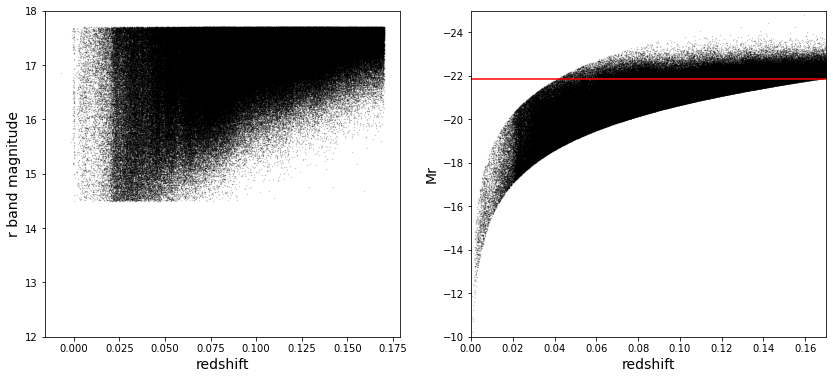

In [8]:
plt.figure(figsize=(14,6))

plt.subplot(121)
plt.scatter(z,rmag,c='black',s=0.1,alpha=0.3)
plt.xlabel("redshift",fontsize=14)
plt.ylabel("r band magnitude",fontsize=14)
plt.ylim(12,18)

plt.subplot(122)
plt.scatter(z[~np.isnan(Mr)],Mr[~np.isnan(Mr)],c='black',s=0.1,alpha=0.3)
plt.axhline(y=rcrit,c='r')
# plt.axvline(x=0.17,c='cyan')
plt.xlabel("redshift",fontsize=14)
plt.ylabel("Mr",fontsize=14)
plt.gca().invert_yaxis()
plt.xlim(0,0.17)
plt.ylim(-10,-25)

plt.show()

In [9]:
np.min(Mr[~np.isnan(Mr)]),np.max(Mr[~np.isnan(Mr)])

(-24.795398361599123, 0.7883527676942972)

In [10]:
rcrit

-21.86334591959251

In [28]:
volsam=np.where((Mr<rcrit)&(rmag<17.7)&(rmag>14.5))[0]

/var/folders/9m/m8964gr50w3347xwt0ymr2jm0000gp/T/ipykernel_31807/4053574943.py:1: RuntimeWarning: invalid value encountered in less
  volsam=np.where((Mr<rcrit)&(rmag<17.7)&(rmag>14.5))[0]


In [29]:
ID=data[0][volsam]
z=data[1][volsam]
z_err=data[2][volsam]
RA=data[3][volsam]
DEC=data[4][volsam]
gmag=data[5][volsam]
rmag=data[6][volsam]
imag=data[7][volsam]
halpha=data[8][volsam]
halpha_err=data[9][volsam]
hbeta=data[10][volsam]
hbeta_err=data[11][volsam]
oiii=data[12][volsam]
oiii_errr=data[13][volsam]
oi=data[14][volsam]
oi_err=data[15][volsam]
nii=data[16][volsam]
nii_err=data[17][volsam]
sii6717=data[18][volsam]
sii6717_err=data[19][volsam]
sii6731=data[20][volsam]
sii6731_err=data[21][volsam]
hdelta=data[22][volsam]
hdelta_err=data[23][volsam]

In [32]:

volsamemgal=np.where((halpha>0)&(hbeta>0)&(oiii>0)&(nii>0))[0]
# emindx=np.where((halpha[volsam]>0)&(hbeta[volsam]>0)&(oiii[volsam]>0)&(nii[volsam]>0))[0]
len(volsam),len(volsamemgal)

(83324, 66613)

In [34]:
niiHal=np.log10(nii[volsamemgal]/halpha[volsamemgal])
oiiiHbeta=np.log10(oiii[volsamemgal]/hbeta[volsamemgal])

In [35]:
xxx=np.linspace(-3,0.05,100)
xxx2=np.linspace(-3,0.47,100)
def kauff03(x):
    return 0.61/(x-0.05)+1.3
def Kew01(x):
    return 0.61/(x-0.47) +1.19

/var/folders/9m/m8964gr50w3347xwt0ymr2jm0000gp/T/ipykernel_31807/2303452075.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return 0.61/(x-0.05)+1.3
/var/folders/9m/m8964gr50w3347xwt0ymr2jm0000gp/T/ipykernel_31807/2303452075.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return 0.61/(x-0.47) +1.19


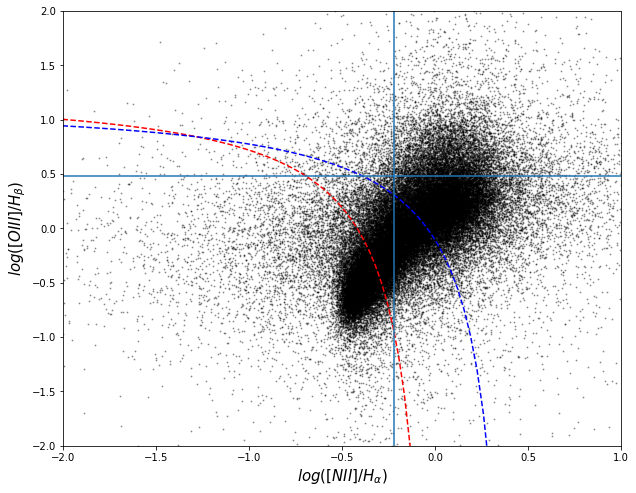

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(niiHal,oiiiHbeta,c='black',s=1,alpha=0.3)
plt.plot(xxx,kauff03(xxx),c='red',ls='--')
plt.plot(xxx2,Kew01(xxx2),c='blue',ls='--')
plt.xlim(-2,1)
plt.ylim(-2,2)
plt.ylabel('$log ([O III] / H_{β})$',fontsize=15)
plt.xlabel('$log ([N II]/H_{α})$',fontsize=15)
plt.axhline(y=np.log10(3))
plt.axvline(x=np.log10(0.6))
plt.show()

sigma5=np.zeros(len(volsam))
for i, idx in enumerate(volsam):
    rai=RA[idx]
    deci=DEC[idx]
    onedeg=(cosmo.angular_diameter_distance(z[idx])/u.rad).to('Mpc/degree')
    samp2=np.where((RA<rai+2)&(RA>rai-2)&(DEC<deci+2)&(DEC>deci-2)&(z<z[idx]+0.003)&(z<z[idx]-0.003))[0]
    print(len(samp2))
    if len(samp2)<5:
        sigma5[i]=0.000000001
    else:
        distance=np.zeros(len(samp2))
        for j, idx2 in enumerate(samp2):
            raj=RA[idx2]
            decj=DEC[idx2]
            radist=(abs(rai-raj)*u.degree*onedeg).value
            decdist=(abs(deci-decj)*u.degree*onedeg).value
            distance[j]=np.sqrt(radist**2+decdist**2)
        top5dist=np.sort(distance)[4]
        sigma5[i]=5/(np.pi*top5dist**2)

In [42]:
Kauffagn=[]
for i,idx in enumerate(volsamemgal):
    if niiHal[i]>=0.05 or oiiiHbeta[i]>kauff03(niiHal[i]):
        Kauffagn.append(idx)

In [43]:
Kewagn=[]
for i,idx in enumerate(volsamemgal):
    if niiHal[i]>=0.47 or oiiiHbeta[i]>Kew01(niiHal[i]):
        Kewagn.append(idx)

In [99]:
nonliner=[]
for i,idx in enumerate(volsamemgal):
    if niiHal[i]>=0.47 or oiiiHbeta[i]>Kew01(niiHal[i]) and oiiiHbeta[i]>np.log10(3):
        Kewagn.append(idx)

In [100]:
len(Kauffagn),len(Kewagn)

(49562, 51964)

In [101]:
sigma5=np.load('sigma5.npy')

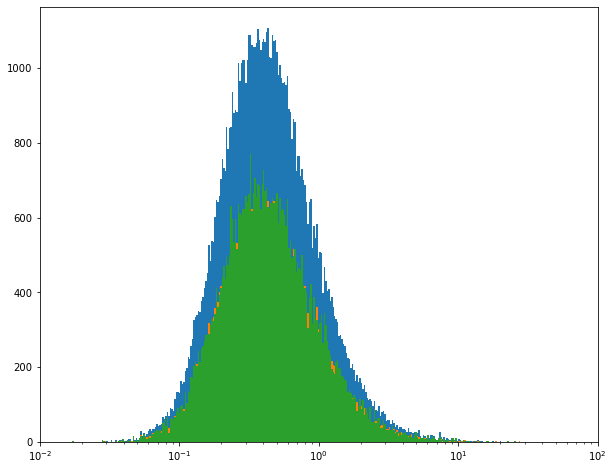

In [102]:
plt.figure(figsize=(10,8))
plt.hist(sigma5,bins=np.logspace(np.log10(np.min(sigma5)),np.log10(np.max(sigma5)),1000))
plt.hist(sigma5[Kauffagn],bins=np.logspace(np.log10(np.min(sigma5)),np.log10(np.max(sigma5)),1000))
plt.hist(sigma5[Kewagn],bins=np.logspace(np.log10(np.min(sigma5)),np.log10(np.max(sigma5)),1000))
plt.xscale('log')
plt.xlim(0.01,100)
plt.show()

In [103]:
nbin=50
binn=np.logspace(np.log10(0.03),np.log10(15),nbin)

In [104]:
sigmahist, sigbin = np.histogram(sigma5,bins=binn)
k03agnhist, sigbin1=np.histogram(sigma5[Kauffagn],bins=binn)
k01agnhist, sigbin2=np.histogram(sigma5[Kewagn],bins=binn)
nonlinershist,sigbin3=np.histogram(sigma5[nonliner],bins=binn)

In [105]:
len(sigbin),len(sigmahist)

(50, 49)

In [106]:
k03agnf=np.zeros(nbin-1)
k01agnf=np.zeros(nbin-1)
nonlinerf=np.zeros(nbin-1)
for i in range(nbin-1):
    if sigmahist[i]>0:
        k03agnf[i]=k03agnhist[i]/sigmahist[i]
        k01agnf[i]=k01agnhist[i]/sigmahist[i]
        nonlinerf[i]=nonlinershist[i]/sigmahist[i]

In [107]:
xx=np.zeros(nbin-1)
for i in range(nbin-1):
    xx[i]=0.5*(binn[i]+binn[i+1])

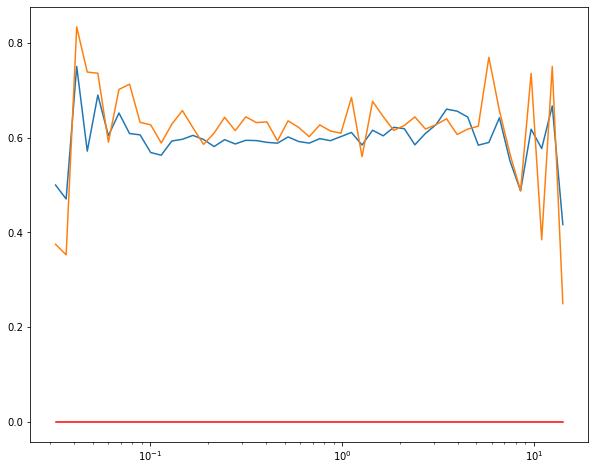

In [109]:
plt.figure(figsize=(10,8))
plt.plot(xx,k03agnf)
plt.plot(xx,k01agnf)
plt.plot(xx,nonlinerf,c='r')
plt.xscale('log')
plt.show()